## Visualización de datos de energía

### Carga de datos desde fichero CSV
La carga de datos en pandas es una de las tareas más comunes y puede realizarse utilizando la función pd.read_csv() para archivos CSV.

In [1]:
import pandas as pd
import numpy as np

# Carga de datos de energía
energia_df = pd.read_csv('data/m1_e5_datos_energia_mes.csv', index_col=0)
print(energia_df.head())

            Consumo  Consumo_Maximo  Consumo_Minimo  Consumo_Promedio
Fecha                                                                
2024-01-01    200.5           250.0           180.0             210.0
2024-02-01    220.0           270.0           190.0             230.0
2024-03-01    240.7           290.0           210.0             250.0
2024-04-01    260.4           310.0           230.0             270.0
2024-05-01    280.8           350.0           250.0             290.0


### Gráfico de Barras:
Los gráficos de barras se utilizan principalmente para comparar cantidades entre diferentes categorías o grupos.

#### Características principales:
- **Comparación de categorías**: Son ideales para mostrar comparaciones directas entre diferentes grupos o categorías. Cada barra representa una categoría, y la altura o longitud de la barra indica la cantidad asociada a esa categoría.
- **Visualización discreta**: Se utilizan mejor para datos discretos (por ejemplo, ventas por producto, población por país, etc.).
- **Claridad en diferencias**: Ayuda a visualizar diferencias entre categorías que no están relacionadas de forma secuencial.

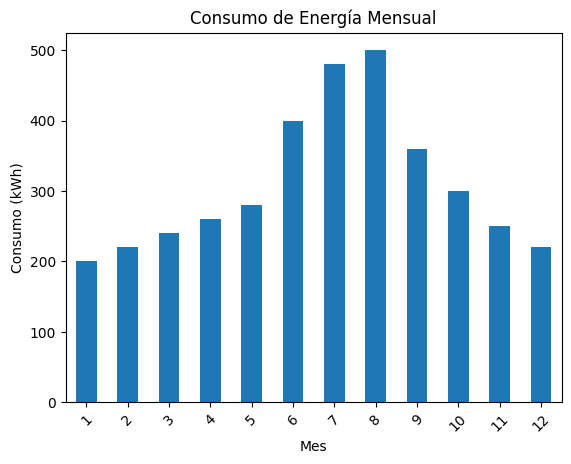

In [2]:
import matplotlib.pyplot as plt

# Nos aseguramos que el índice es un objeto fecha
energia_df = energia_df.set_index(pd.to_datetime(energia_df.index))
# Crear nuevas columnas para el mes y el año
energia_df['Mes'] = energia_df.index.month  # Extraer el mes
energia_df['Año'] = energia_df.index.year   # Extraer el año

# Gráfico de barras del consumo de energía
energia_df = energia_df.set_index('Mes')
energia_df['Consumo'].plot(kind='bar')
plt.title('Consumo de Energía Mensual')
plt.xlabel('Mes')
plt.ylabel('Consumo (kWh)')
plt.xticks(rotation=45)  # Rotar etiquetas del eje x para mejor visibilidad
plt.show()

### Gráfico de Líneas:
Los gráficos de líneas son útiles para visualizar la evolución de una variable a lo largo del tiempo o para mostrar la relación entre datos secuenciales.

#### Características principales:
- **Tendencias a lo largo del tiempo**: Se utilizan principalmente para mostrar cómo cambian las variables continuas a lo largo del tiempo o en secuencias ordenadas. Es ideal para series temporales.
- **Continuidad**: Conectan puntos de datos con líneas, lo que ayuda a resaltar las tendencias o patrones en datos continuos.
- **Diferencias sutiles**: Las líneas permiten visualizar pequeños cambios o variaciones entre los puntos de datos.

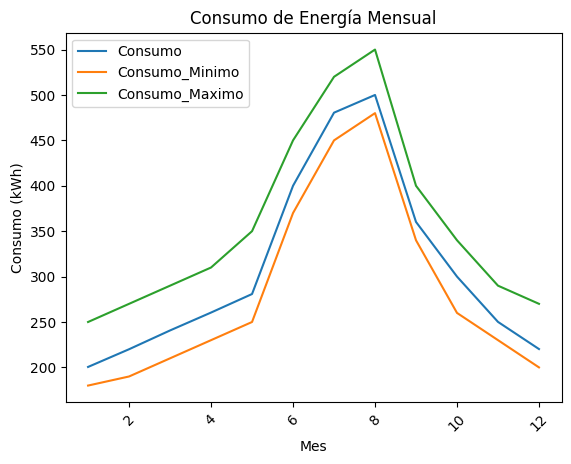

In [3]:
energia_df[['Consumo', 'Consumo_Minimo', 'Consumo_Maximo']].plot()
plt.title('Consumo de Energía Mensual')
plt.xlabel('Mes')
plt.ylabel('Consumo (kWh)')
plt.xticks(rotation=45)  # Rotar etiquetas del eje x para mejor visibilidad
plt.show()

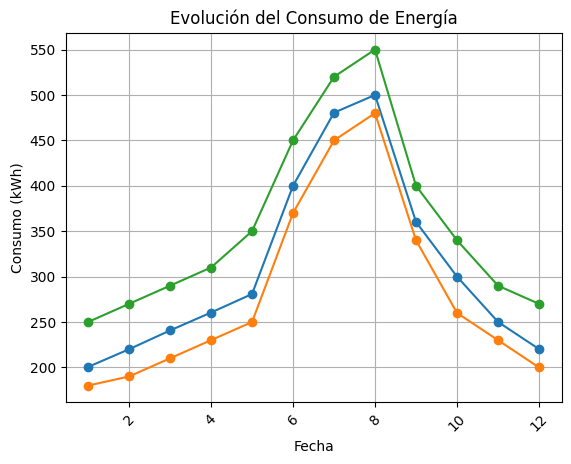

In [4]:
plt.plot(energia_df.index, energia_df[['Consumo', 'Consumo_Minimo', 'Consumo_Maximo']], marker='o')
plt.title('Evolución del Consumo de Energía')
plt.xlabel('Fecha')
plt.ylabel('Consumo (kWh)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### Diferencias Clave:
1. **Tipo de datos**:
   - **Barras**: Son mejores para comparar categorías independientes o discretas.
   - **Líneas**: Son mejores para mostrar tendencias en datos continuos o secuenciales (como una serie temporal).

2. **Propósito**:
   - **Barras**: Enfatizan la comparación entre diferentes grupos o categorías.
   - **Líneas**: Enfatizan la evolución o tendencia de los datos a lo largo del tiempo.

3. **Claridad visual**:
   - **Barras**: Son más claras cuando los valores no están conectados o no tienen una relación de continuidad.
   - **Líneas**: Ayudan a mostrar la continuidad y los cambios graduales en los datos.

### ¿Cuándo usar cada uno?
- **Gráfico de Barras**: Cuando quieres comparar cantidades entre varias categorías independientes (por ejemplo, consumo de energía por tipo de electrodoméstico).
- **Gráfico de Líneas**: Cuando deseas mostrar cómo cambia una variable con el tiempo o en secuencia (por ejemplo, evolución del consumo de energía mes a mes).

### Histograma
Un histograma es un tipo de gráfico que muestra la distribución de frecuencias de un conjunto de datos numéricos. Representa cómo se distribuyen los valores de una variable continua o cuantitativa en diferentes rangos o "bins" (intervalos), lo que permite visualizar la forma de la distribución, como si fuera un resumen visual de los datos.

#### Partes de un histograma:
* Eje X (Horizontal): Muestra los intervalos o rangos de los valores de la variable.
  * Por ejemplo, si tienes datos de consumos de energía, el eje X puede representar diferentes rangos de consumo (por ejemplo, 100-150 kWh, 150-200 kWh, etc.).
* Eje Y (Vertical): Muestra la frecuencia, es decir, cuántos valores de datos caen dentro de cada intervalo.
  * Por ejemplo, cuántos días tuvieron un consumo de energía entre 100 y 150 kWh.
* Barras: Cada barra del histograma representa la cantidad de observaciones (frecuencia) dentro de un intervalo específico de la variable.
  * La altura de cada barra refleja cuántos datos caen en ese intervalo.


Text(0, 0.5, 'Frecuencia')

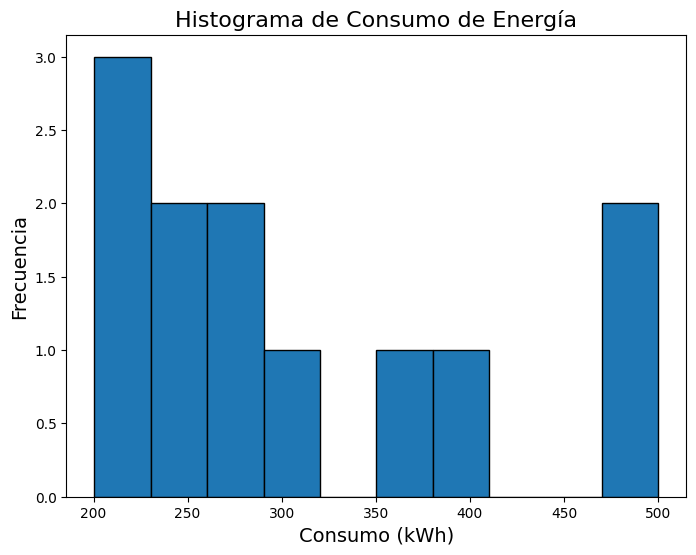

In [5]:
# Crear el histograma de la columna 'Consumo'
plt.figure(figsize=(8, 6))
plt.hist(energia_df['Consumo'], bins=10, edgecolor='black')

# Añadir títulos y etiquetas
plt.title('Histograma de Consumo de Energía', fontsize=16)
plt.xlabel('Consumo (kWh)', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)

#### ¿Qué muestra un histograma?
* Distribución: El histograma te permite ver cómo están distribuidos los datos. Por ejemplo, si los valores se agrupan más en ciertos rangos o si están repartidos uniformemente.
* Frecuencia: Muestra cuántas veces ocurren los valores dentro de ciertos intervalos. Puedes ver si hay valores atípicos (outliers) o si la mayor parte de los datos se concentra en una región específica.
* Forma de la distribución: Un histograma puede ayudarte a identificar la forma de la distribución de los datos:
  * Distribución normal: Tiene una forma de campana, con la mayoría de los datos agrupados cerca de la media.
  * Distribución sesgada: Si hay una inclinación hacia la izquierda o derecha, puede sugerir una asimetría en los datos.
  * Distribución uniforme: Todos los intervalos tienen aproximadamente la misma frecuencia.
